In [1]:
import nltk

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to C:\Users\SHIVAM
[nltk_data]     GHUGE\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
from nltk.corpus import gutenberg

In [4]:
dataset = gutenberg.raw('shakespeare-hamlet.txt')

In [5]:
with open(r'C:/Users/SHIVAM GHUGE/Downloads/PredictNextWord/hamlet.txt','w') as f:
  f.write(dataset)

In [6]:
with open(r'C:/Users/SHIVAM GHUGE/Downloads/PredictNextWord/hamlet.txt','r') as f:
  print(f.readline())

[The Tragedie of Hamlet by William Shakespeare 1599]



In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = Tokenizer(oov_token='UNK')

In [9]:
with open(r'C:/Users/SHIVAM GHUGE/Downloads/PredictNextWord/hamlet.txt','r') as f:
  text = f.read().lower()

In [10]:
tokenizer.fit_on_texts([text])

In [11]:
tokenizer.word_index

{'UNK': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'of': 5,
 'i': 6,
 'you': 7,
 'a': 8,
 'my': 9,
 'it': 10,
 'in': 11,
 'that': 12,
 'ham': 13,
 'is': 14,
 'not': 15,
 'his': 16,
 'this': 17,
 'with': 18,
 'your': 19,
 'but': 20,
 'for': 21,
 'me': 22,
 'lord': 23,
 'as': 24,
 'what': 25,
 'he': 26,
 'be': 27,
 'so': 28,
 'him': 29,
 'haue': 30,
 'king': 31,
 'will': 32,
 'no': 33,
 'our': 34,
 'we': 35,
 'on': 36,
 'are': 37,
 'if': 38,
 'all': 39,
 'then': 40,
 'shall': 41,
 'by': 42,
 'thou': 43,
 'come': 44,
 'or': 45,
 'hamlet': 46,
 'good': 47,
 'do': 48,
 'hor': 49,
 'her': 50,
 'let': 51,
 'now': 52,
 'thy': 53,
 'how': 54,
 'more': 55,
 'they': 56,
 'from': 57,
 'enter': 58,
 'at': 59,
 'was': 60,
 'oh': 61,
 'like': 62,
 'most': 63,
 'there': 64,
 'well': 65,
 'know': 66,
 'selfe': 67,
 'would': 68,
 'them': 69,
 'loue': 70,
 'may': 71,
 "'tis": 72,
 'vs': 73,
 'sir': 74,
 'qu': 75,
 'which': 76,
 'did': 77,
 'why': 78,
 'laer': 79,
 'giue': 80,
 'thee': 81,
 'ile': 82,
 'must': 8

*creating n-gram sequences*

In [12]:
sentences = []
for line in text.split('\n'):
  seq = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(seq)):
    n_gram_seq = seq[:i+1]
    sentences.append(n_gram_seq)

In [13]:
sentences

[[2, 688],
 [2, 688, 5],
 [2, 688, 5, 46],
 [2, 688, 5, 46, 42],
 [2, 688, 5, 46, 42, 1887],
 [2, 688, 5, 46, 42, 1887, 1888],
 [2, 688, 5, 46, 42, 1887, 1888, 1889],
 [1181, 1890],
 [1181, 1890, 1891],
 [1181, 1890, 1891, 1892],
 [58, 408],
 [58, 408, 3],
 [58, 408, 3, 1182],
 [58, 408, 3, 1182, 178],
 [58, 408, 3, 1182, 178, 1893],
 [408, 1183],
 [408, 1183, 64],
 [409, 163],
 [409, 163, 378],
 [409, 163, 378, 22],
 [409, 163, 378, 22, 248],
 [409, 163, 378, 22, 248, 883],
 [19, 67],
 [452, 225],
 [452, 225, 249],
 [452, 225, 249, 2],
 [452, 225, 249, 2, 31],
 [409, 408],
 [452, 26],
 [409, 7],
 [409, 7, 44],
 [409, 7, 44, 63],
 [409, 7, 44, 63, 1894],
 [409, 7, 44, 63, 1894, 97],
 [409, 7, 44, 63, 1894, 97, 19],
 [409, 7, 44, 63, 1894, 97, 19, 567],
 [452, 72],
 [452, 72, 52],
 [452, 72, 52, 1895],
 [452, 72, 52, 1895, 568],
 [452, 72, 52, 1895, 568, 379],
 [452, 72, 52, 1895, 568, 379, 81],
 [452, 72, 52, 1895, 568, 379, 81, 4],
 [452, 72, 52, 1895, 568, 379, 81, 4, 274],
 [452, 72

*padding*

In [14]:
V = len(tokenizer.word_index)+1

V

4819

In [15]:
T = max([len(seq) for seq in sentences])

T

14

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
padded_sentence = pad_sequences(sentences,maxlen=T)

In [18]:
padded_sentence.shape

(25732, 14)

In [19]:
# we split all the words as input and only last word of each sentence as our target

X = padded_sentence[:,:-1]
y = padded_sentence[:,-1]

In [20]:
len(X)

25732

In [21]:
import tensorflow

y = tensorflow.keras.utils.to_categorical(y,num_classes=V)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
len(y_train)

18012

*creating neural network*

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,LSTM,Dropout,Embedding
from tensorflow.keras.losses import CategoricalCrossentropy

In [53]:
i = Input((T-1,))
x = Embedding(V,100)(i)
x = LSTM(64,return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(64)(x)

x = Dense(128,activation='relu')(x)
x = Dense(V)(x)

In [54]:
model = Model(i,x)

In [55]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 13, 100)        │       481,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 13, 64)         │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4819)           │       621,651 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,187,135 (4.53 MB)

 Trainable params: 1,187,135 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

** *Note : categorical cross-entropy loss, where the true labels are represented as one-hot encoded vectors, sparse categorical cross-entropy loss expects the target labels to be integers indicating the class indices directly.*

In [56]:
from keras import backend as K
import tensorflow as tf


def custom_masked_loss(y_true,y_pred):
  mask = tf.cast(tf.not_equal(y_true,0),float)

  # Calculate the loss only where mask is 1
  loss = CategoricalCrossentropy(from_logits=True)(y_true,y_pred)*mask

  # Apply the mask to the loss
  loss = loss*mask

  # Normalize the loss by the number of non-padded elements
  return tf.math.reduce_sum(loss)/tf.math.reduce_sum(mask)

In [57]:
model.compile(optimizer='adam',loss=custom_masked_loss,metrics=['accuracy'])

In [58]:
import datetime

log_dir = './logs/fit' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [59]:
from tensorflow.keras.callbacks import TensorBoard

tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint('best_model.keras',save_best_only=True,monitor='val_accuracy')

In [ ]:
help(EarlyStopping)

In [62]:
f = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,callbacks=[callback,tensorflow_callback])

Epoch 1/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0592 - loss: 5.7844 - val_accuracy: 0.0543 - val_loss: 7.2606
Epoch 2/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0637 - loss: 5.6589 - val_accuracy: 0.0509 - val_loss: 7.3944
Epoch 3/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0723 - loss: 5.5373 - val_accuracy: 0.0526 - val_loss: 7.5074
Epoch 4/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0766 - loss: 5.4198 - val_accuracy: 0.0565 - val_loss: 7.5771
Epoch 5/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0777 - loss: 5.3264 - val_accuracy: 0.0562 - val_loss: 7.8254
Epoch 6/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0884 - loss: 5.1881 - val_accuracy: 0.0579 - val_loss: 7.8336
Epoch 7/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0945 - loss: 5.1072 - val_accuracy: 0.0570 - val_loss: 7.9684
Epoch 8/200
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0985 - loss: 4.9937 - 

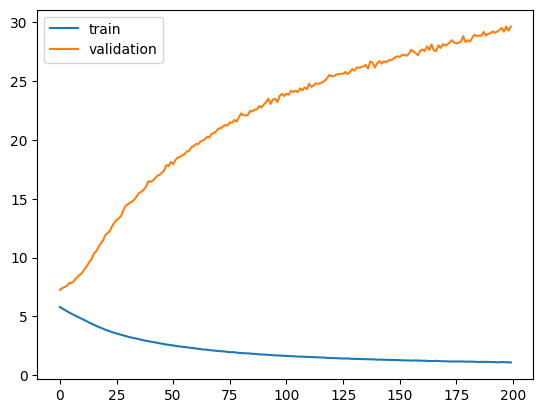

In [63]:
import matplotlib.pyplot as plt

plt.plot(f.history['loss'],label = 'train')
plt.plot(f.history['val_loss'],label = 'validation')
plt.legend()

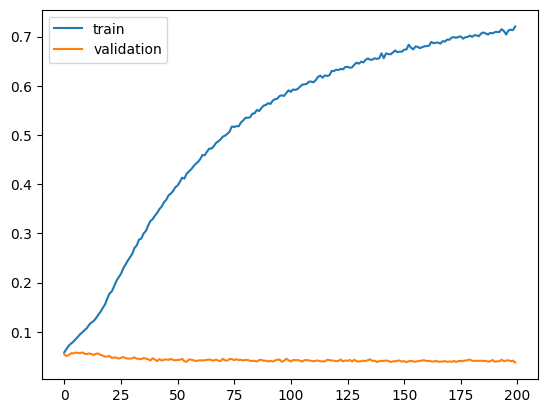

In [64]:
plt.plot(f.history['accuracy'],label = 'train')
plt.plot(f.history['val_accuracy'],label = 'validation')
plt.legend()

In [65]:
model.evaluate(X_test,y_test)

242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0414 - loss: 28.9631


[29.65069007873535, 0.037694301456213]

In [66]:
pred = model.predict(X_test)

242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [67]:
pred.shape

(7720, 4819)

*function to predict next word*

In [75]:
import tensorflow as tf

def predict_next_word(sentence,model,tokenize,max_len):
  token = tokenize.texts_to_sequences([sentence])[0]
  if len(token) > max_len:
    token = token[-(max_len-1):]
  padded_token = pad_sequences([token],maxlen=max_len-1)
  logits = model.predict(padded_token)
  pred = tf.nn.softmax(logits).numpy()
  pred = pred.argmax(axis=1)
  for word,index in tokenize.word_index.items():
    if index == pred:
      return word
  return None

In [73]:
# sentence = 'And I am sicke at'
sentence = 'Marcellus, the Riuals of my Watch, bid them make'

In [79]:
sent = 'Fran. For this releefe much thankes:'
word_1 = predict_next_word(sent,model,tokenizer,14)
word_2 = predict_next_word(sent+word_1,model,tokenizer,14)
word_3 = predict_next_word(word_1+word_2,model,tokenizer,14)
print(word_1,word_2,word_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
'tis the shriuing


In [80]:
import pickle

with open('model_tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [83]:
model.save('next_word_model.keras')

In [102]:
from tensorflow.keras.models import load_model


new_model = load_model('next_word_model.keras',compile=False)

In [103]:
import keras

@keras.saving.register_keras_serializable()
def custom_masked_loss_n(y_true,y_pred):
  mask = tf.cast(tf.not_equal(y_true,0),float)

  # Calculate the loss only where mask is 1
  loss = CategoricalCrossentropy(from_logits=True)(y_true,y_pred)*mask

  # Apply the mask to the loss
  loss = loss*mask

  # Normalize the loss by the number of non-padded elements
  return tf.math.reduce_sum(loss)/tf.math.reduce_sum(mask)

In [104]:
new_model.compile(optimizer='adam',loss='custom_masked_loss_n')

In [106]:
sent = 'And I am sicke at'
predict_next_word(sent,new_model,tokenizer,14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'heart'

In [108]:
new_model.save('next_word_model_2.keras')